In [64]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [65]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
%matplotlib inline

Text(0.5,1,'x ~ N(0,1)')

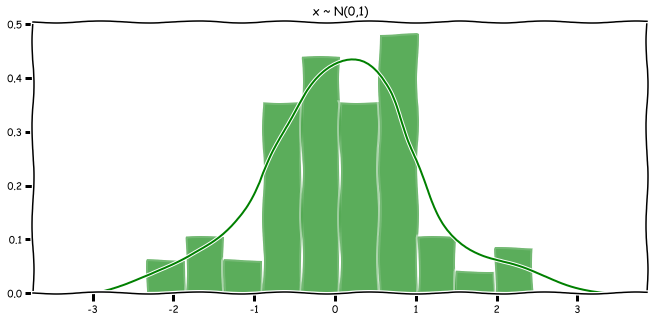

In [66]:
# 13.a. create standard normal vector
x = np.random.standard_normal(100)
plt.figure(figsize = (11, 5))
sns.distplot(x, color = 'g')
plt.title("x ~ N(0,1)")

Text(0.5,1,'eps ~ N(0,0.25)')

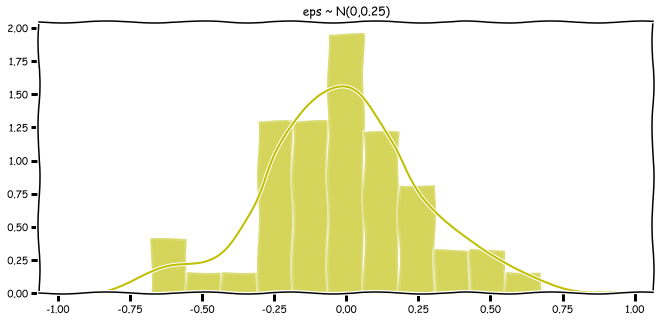

In [67]:
# 13.b. create eps ~ N(0,0.25)
eps = np.random.normal(0, 0.25, 100)
plt.figure(figsize = (11, 5))
sns.distplot(eps, color = 'y')
plt.title("eps ~ N(0,0.25)")

In [68]:
# 13.c. generate vector y = -1 + 0.5*x + eps

y = -1 + (0.5*x) + eps
print("Length of vector y: ", len(y))
print("Beta_0: ", -1.0)
print("Beta_1: ", 0.5)

Length of vector y:  100
Beta_0:  -1.0
Beta_1:  0.5


Text(0,0.5,'y')

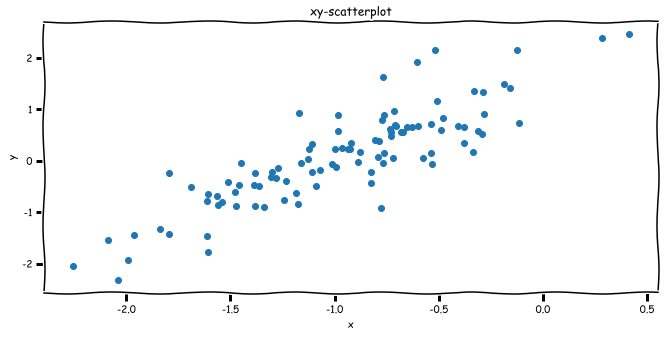

In [69]:
# 13.d. generate scatterplot
plt.figure(figsize = (11, 5))
plt.scatter(y, x)
plt.title("xy-scatterplot")
plt.xlabel("x")
plt.ylabel("y")

In [70]:
# 13.e. fitting a linear model
data = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis = 1)
data.columns = ['x', 'y']
reg_1 = ols("y~x", data = data).fit()
f1 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f1)
print(reg_1.summary())
print()
print("Beta_hat_0: %f" % reg_1.params[0])
print("Beta_hat_1: %f" % reg_1.params[1])
print()
print("Difference in Beta_0: ", -1.0 - reg_1.params[0])
print("Difference in Beta_1: ", 0.5 - reg_1.params[1])
print()

y =   
0.4853 x - 1.011
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     288.2
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           6.07e-31
Time:                        18:08:09   Log-Likelihood:                -8.3435
No. Observations:                 100   AIC:                             20.69
Df Residuals:                      98   BIC:                             25.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0114      0

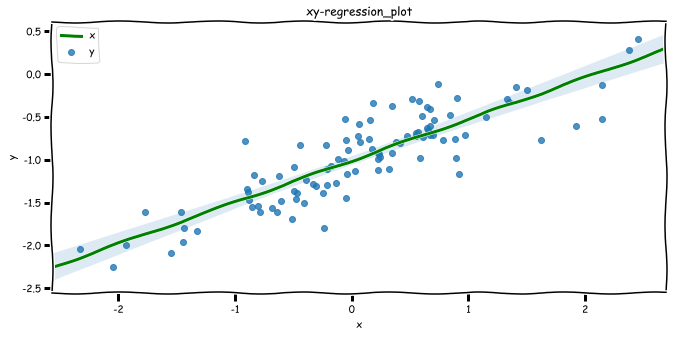

In [71]:
# 13.f. displaying the least squares line calculated in 13.d.
plt.figure(figsize = (11, 5))
reg_plot = sns.regplot(x, y, data = data)
regline = reg_plot.get_lines()[0]
regline.set_color('green')
plt.title("xy-regression_plot")
plt.xlabel("x")
plt.ylabel("y")
labels = ['x', 'y']
plt.legend(labels)

In [72]:
# 13.g. polynomial regression
reg_2 = ols("y~x+I(pow(x, 2))", data = data).fit()
f2 = np.poly1d(np.polyfit(x, y, 2))
print("y = ", f2)
print(reg_2.summary())
print()
RMSE_1 = np.sqrt(reg_1.mse_model) # root mean squared error of the first regression model
RMSE_2 = np.sqrt(reg_2.mse_model) # root mean squared error of the first regression model
print("RMSE_1:", RMSE_1) # this value in the range ~ 5.0
print("RMSE_2:", RMSE_2) # this value in the range of ~ 3.5
print()
print(colored('='*78, 'green'))
print()

y =            2
-0.02798 x + 0.4908 x - 0.9875
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           4.92e-30
Time:                        18:08:21   Log-Likelihood:                -7.3437
No. Observations:                 100   AIC:                             20.69
Df Residuals:                      97   BIC:                             28.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------


In [73]:
# 13.h. regression after reducing variance
eps_r = eps/4 # the _r connotes "reduced"
y_r = -1 + (0.5*x) + eps_r

In [74]:
print("Variance of eps: ", eps.var())
print("Variance of eps_r: ", eps_r.var()) # confirms that the overall variance is reduced

Variance of eps:  0.069369324574796
Variance of eps_r:  0.00433558278592475


Text(0,0.5,'y_r')

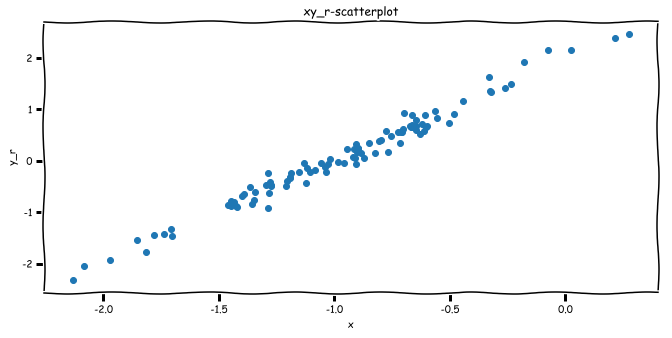

In [75]:
plt.figure(figsize = (11, 5))
plt.scatter(y_r, x)
plt.title("xy_r-scatterplot")
plt.xlabel("x")
plt.ylabel("y_r")

In [76]:
data_r = pd.concat([pd.DataFrame(x), pd.DataFrame(y_r)], axis = 1)
data.columns = ['x', 'y_r']
reg_r_1 = ols("y_r~x", data = data).fit()
f_r_1 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_r_1)
print(reg_r_1.summary())
print()
print("Beta_hat_r_0: %f" % reg_r_1.params[0])
print("Beta_hat_r_1: %f" % reg_r_1.params[1])
print()
print("Difference in Beta_0: ", -1.0 - reg_r_1.params[0])
print("Difference in Beta_1: ", 0.5 - reg_r_1.params[1])
print()

y =   
0.4853 x - 1.011
                            OLS Regression Results                            
Dep. Variable:                    y_r   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     288.2
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           6.07e-31
Time:                        18:08:48   Log-Likelihood:                -8.3435
No. Observations:                 100   AIC:                             20.69
Df Residuals:                      98   BIC:                             25.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0114      0

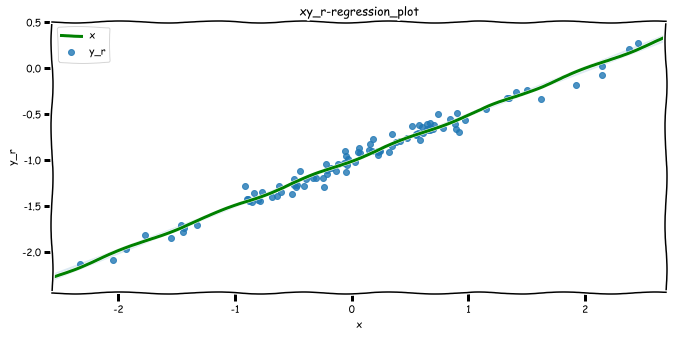

In [77]:
plt.figure(figsize = (11, 5))
reg_plot_r = sns.regplot(x, y_r, data = data_r)
regline_r = reg_plot_r.get_lines()[0]
regline_r.set_color('green')
plt.title("xy_r-regression_plot")
plt.xlabel("x")
plt.ylabel("y_r")
labels_r = ['x', 'y_r']
plt.legend(labels_r)

In [78]:
reg_r_2 = ols("y_r~x+I(pow(x, 2))", data = data_r).fit()
f_r_2 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_r_2)
print(reg_r_2.summary())
print()
RMSE_r_1 = np.sqrt(reg_r_1.mse_model) # root mean squared error of the first regression model
RMSE_r_2 = np.sqrt(reg_r_2.mse_model) # root mean squared error of the first regression model
print("RMSE_r_1:", RMSE_r_1) # this value in the range ~ 5.0
print("RMSE_r_2:", RMSE_r_2) # this value in the range of ~ 3.5
print()
print(colored('='*78, 'green'))
print()

y =   
0.4853 x - 1.011
                            OLS Regression Results                            
Dep. Variable:                    y_r   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     2436.
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           1.22e-83
Time:                        18:09:10   Log-Likelihood:                 131.29
No. Observations:                 100   AIC:                            -256.6
Df Residuals:                      97   BIC:                            -248.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9969 

In [79]:
# 13.i. regression after increasing the variance
eps_i = eps*4 # the _i connotes "increased"
y_i = -1 + (0.5*x) + eps_i

In [80]:
print("Sum of square of eps: ", eps.var())
print("Sum of square of eps_i: ",eps_i.var()) # confirms that the overall variance is reduced

Sum of square of eps:  0.069369324574796
Sum of square of eps_i:  1.109909193196736


Text(0,0.5,'y_i')

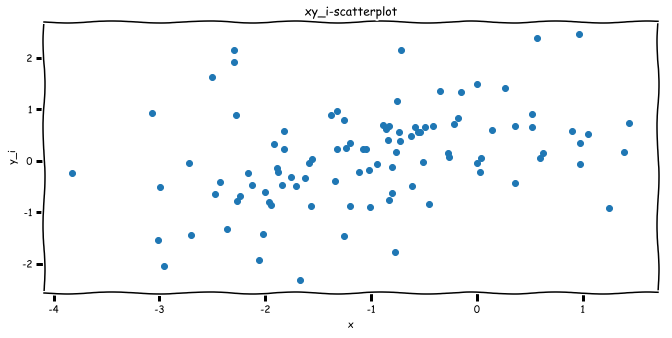

In [81]:
plt.figure(figsize = (11, 5))
plt.scatter(y_i, x)
plt.title("xy_i-scatterplot")
plt.xlabel("x")
plt.ylabel("y_i")

In [82]:
data_i = pd.concat([pd.DataFrame(x), pd.DataFrame(y_i)], axis = 1)
data.columns = ['x', 'y_i']
reg_i_1 = ols("y_i~x", data = data).fit()
f_i_1 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_i_1)
print(reg_i_1.summary())
print()
print("Beta_hat_i_0: %f" % reg_i_1.params[0])
print("Beta_hata_i_1: %f" % reg_i_1.params[1])
print()
print("Difference in Beta_0: ", -1.0 - reg_i_1.params[0])
print("Difference in Beta_1: ", 0.5 - reg_i_1.params[1])
print()

y =   
0.4853 x - 1.011
                            OLS Regression Results                            
Dep. Variable:                    y_i   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     288.2
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           6.07e-31
Time:                        18:09:38   Log-Likelihood:                -8.3435
No. Observations:                 100   AIC:                             20.69
Df Residuals:                      98   BIC:                             25.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0114      0

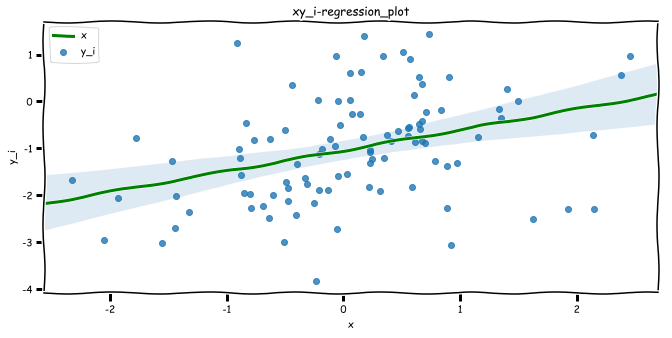

In [83]:
plt.figure(figsize = (11, 5))
reg_plot_i = sns.regplot(x, y_i, data = data_i)
regline_i = reg_plot_i.get_lines()[0]
regline_i.set_color('green')
plt.title("xy_i-regression_plot")
plt.xlabel("x")
plt.ylabel("y_i")
labels_i = ['x', 'y_i']
plt.legend(labels_i)

In [84]:
reg_i_2 = ols("y_i~x+I(pow(x, 2))", data = data_i).fit()
f_i_2 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_i_2)
print(reg_i_2.summary())
print()
RMSE_i_1 = np.sqrt(reg_i_1.mse_model) # root mean squared error of the first regression model
RMSE_i_2 = np.sqrt(reg_i_2.mse_model) # root mean squared error of the first regression model
print("RMSE_i_1:", RMSE_i_1) # this value in the range ~ 5.0
print("RMSE_i_2:", RMSE_i_2) # this value in the range of ~ 3.5
print()
print(colored('='*78, 'green'))
print()

y =   
0.4853 x - 1.011
                            OLS Regression Results                            
Dep. Variable:                    y_i   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     8.496
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           0.000398
Time:                        18:09:57   Log-Likelihood:                -145.97
No. Observations:                 100   AIC:                             297.9
Df Residuals:                      97   BIC:                             305.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9498 

In [85]:
# 13.j. confidence intervals

confint1 = pd.DataFrame(reg_1.conf_int(alpha = 0.05)).T
confint2 = pd.DataFrame(reg_2.conf_int(alpha = 0.05)).T
confint_r_1 = pd.DataFrame(reg_r_1.conf_int(alpha = 0.05)).T
confint_r_2 = pd.DataFrame(reg_r_2.conf_int(alpha = 0.05)).T
confint_i_1 = pd.DataFrame(reg_i_1.conf_int(alpha = 0.05)).T
confint_i_2 = pd.DataFrame(reg_i_2.conf_int(alpha = 0.05)).T

In [86]:
print("95% C.I. of Linear Model:\n", confint1)
print("95% C.I. of Polynomial Model:\n", confint2)
print()
print("95% C.I. of Linear Model with reduced variance:\n", confint_r_1)
print("95% C.I. of Polynomial Model with reduced variance:\n", confint_r_2)
print()
print("95% C.I. of Linear Model with increased variance:\n", confint_r_1)
print("95% C.I. of Polynomial Model with increased variance:\n", confint_r_2)
print()
print(colored('='*78, 'green'))
print()

95% C.I. of Linear Model:
    Intercept         x
0  -1.064329  0.428567
1  -0.958397  0.542022
95% C.I. of Polynomial Model:
    Intercept         x  I(pow(x, 2))
0  -1.050131  0.433820     -0.067667
1  -0.924783  0.547821      0.011697

95% C.I. of Linear Model with reduced variance:
    Intercept         x
0  -1.064329  0.428567
1  -0.958397  0.542022
95% C.I. of Polynomial Model with reduced variance:
    Intercept         x  I(pow(x, 2))
0  -1.012533  0.483455     -0.016917
1  -0.981196  0.511955      0.002924

95% C.I. of Linear Model with increased variance:
    Intercept         x
0  -1.064329  0.428567
1  -0.958397  0.542022
95% C.I. of Polynomial Model with increased variance:
    Intercept         x  I(pow(x, 2))
0  -1.012533  0.483455     -0.016917
1  -0.981196  0.511955      0.002924


